In [1]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
db1 = pd.read_excel('/Users/Alex/Google Drive (alex.keeney766@gmail.com)/College /Fall 2018/Research Methods/dataframePerminant.xlsx')
# create useable data WIthout 2008
db2 = db1.loc[db1.year != 2008, :]
data = db2.loc[:, 'Constant_Tuition':'Applicants']

#Howard and BYU are huge outliers, try removing.  First loc removes the schools, second removes 2008
data2 = db1[~db1.institution_name.isin(['Howard University', 'Brigham Young University-Provo'])].loc[db1.year != 2008, 'Constant_Tuition':'Applicants']

#Split Public and Private
PrivateSchools =  data2.loc[data2.Private == 1].drop(['Private'], axis = 1)
PublicSchools = data2.loc[data2.Private == 0].drop(['Private'], axis = 1)

In [2]:
model_Pri = ols('Constant_Tuition ~ Constant_APGF + Constant_AFSLF + Applicants + rank', PrivateSchools).fit()
print(model_Pri.summary())

                            OLS Regression Results                            
Dep. Variable:       Constant_Tuition   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     73.40
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           2.12e-48
Time:                        10:23:55   Log-Likelihood:                -4602.7
No. Observations:                 480   AIC:                             9215.
Df Residuals:                     475   BIC:                             9236.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        3.03e+04   2871.138     10.

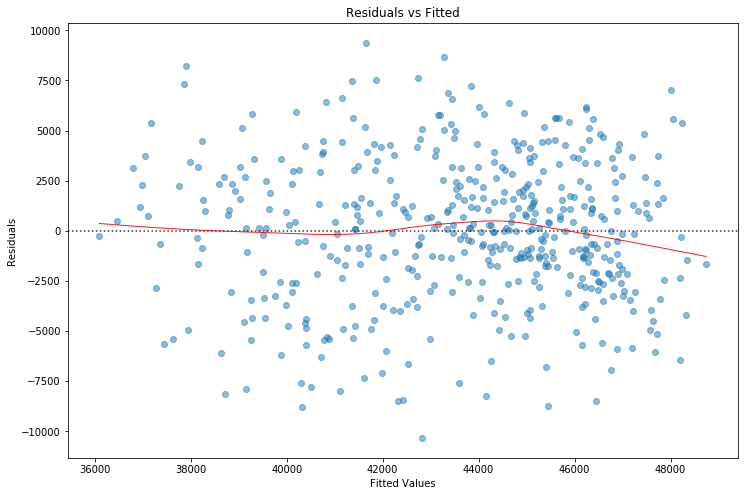

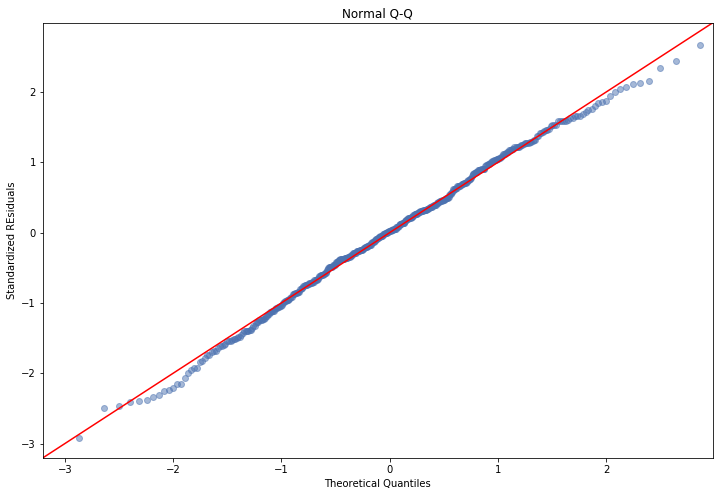

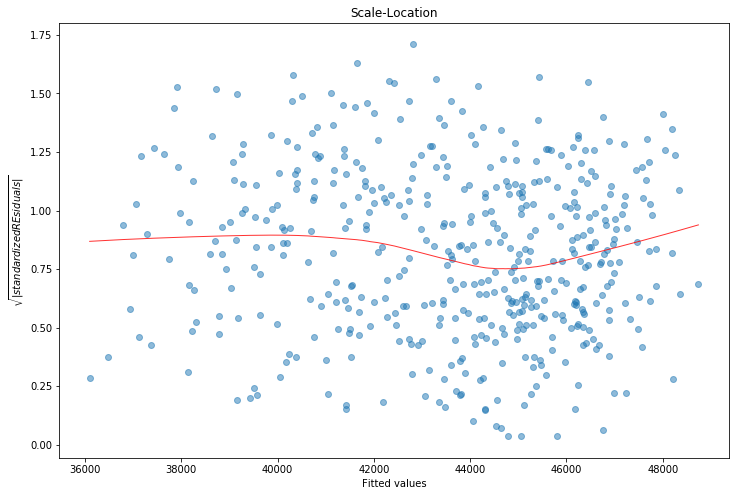

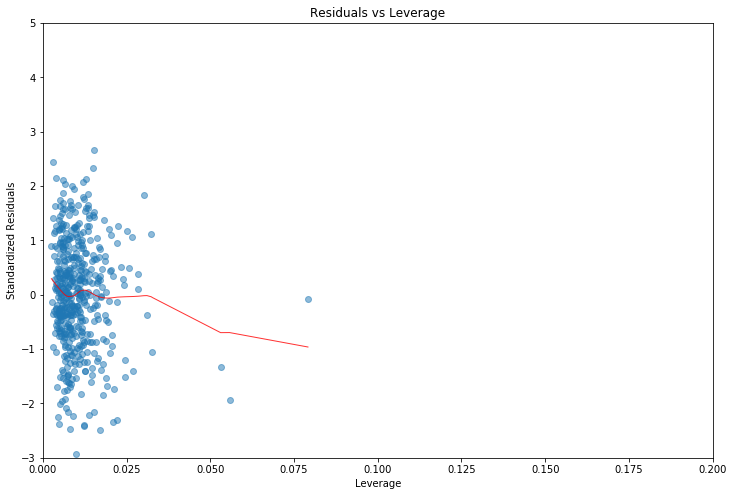

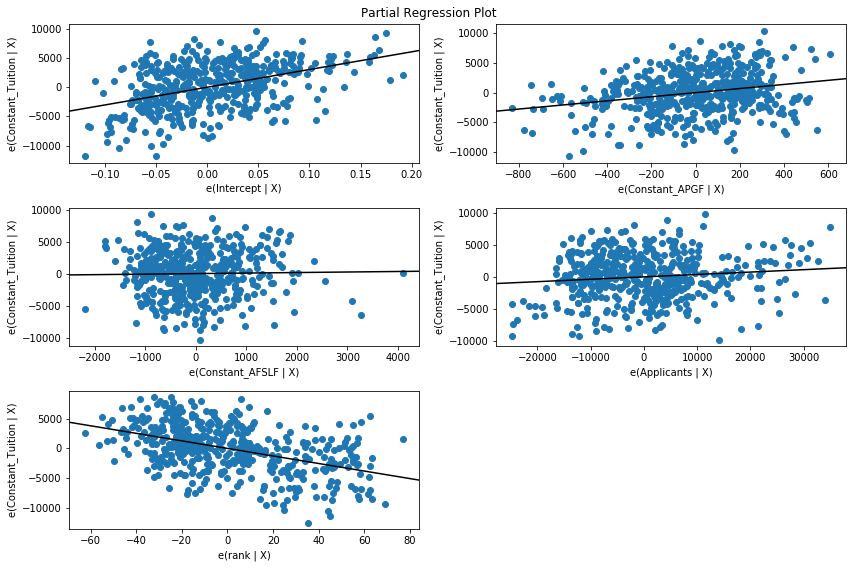

In [26]:
residualplots(model = model_Pri, data = PrivateSchools)

In [7]:
model_Pub = ols('Constant_Tuition ~ Constant_APGF + Constant_AFSLF + Applicants + rank', PublicSchools).fit()
print(model_Pub.summary())

                            OLS Regression Results                            
Dep. Variable:       Constant_Tuition   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     17.42
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           2.32e-13
Time:                        10:37:55   Log-Likelihood:                -4542.6
No. Observations:                 488   AIC:                             9095.
Df Residuals:                     483   BIC:                             9116.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.575e+04   1977.184      7.

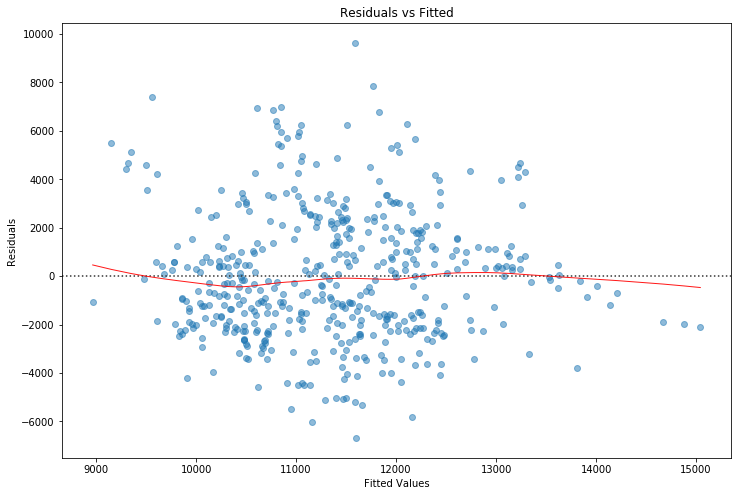

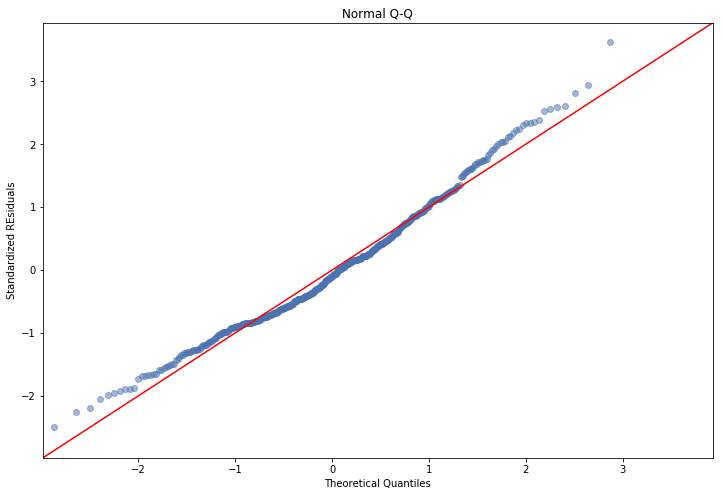

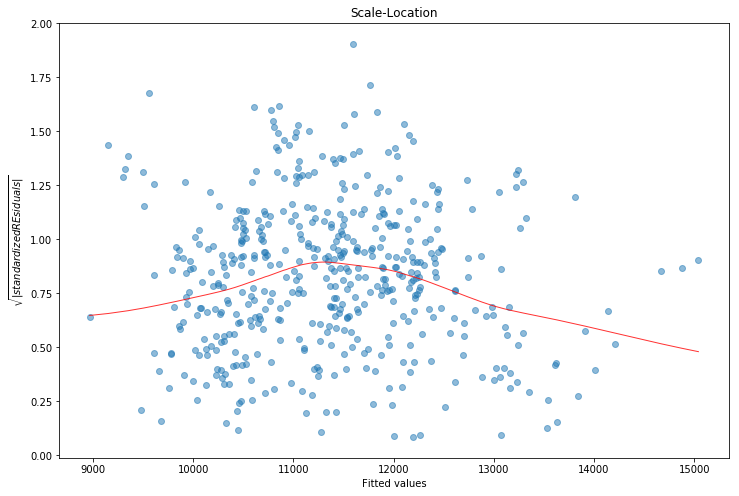

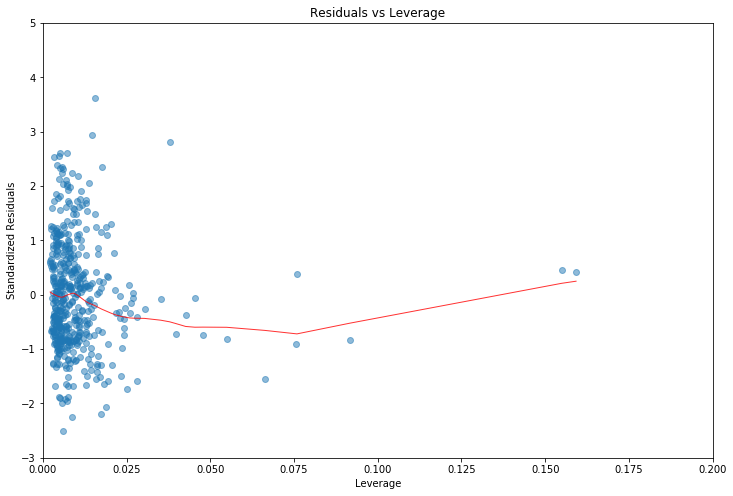

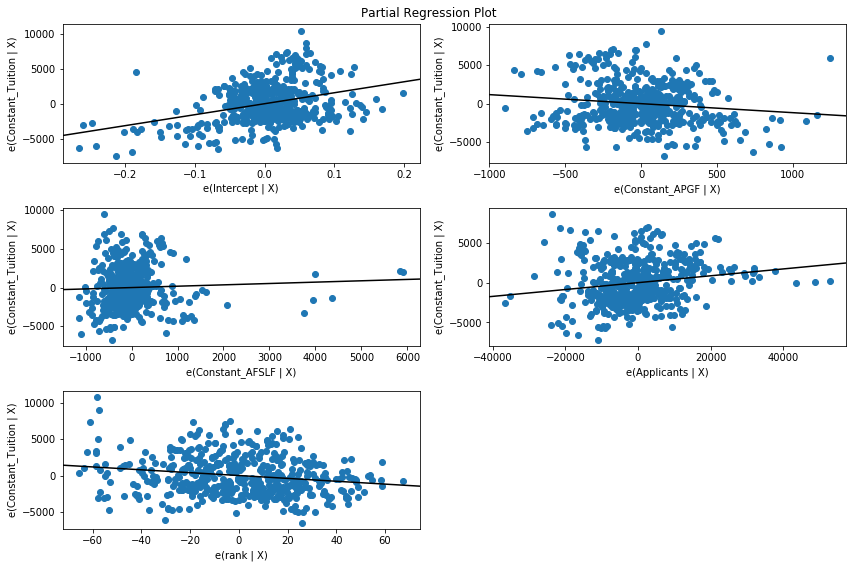

In [27]:
residualplots(model = model_Pub, data = PublicSchools)

In [25]:
def residualplots(model, data):
    from statsmodels.graphics.gofplots import ProbPlot
    import statsmodels.api as sm
    
    # Create Needed statistics
    model_fitted_y = model.fittedvalues
    model_residuals = model.resid
    model_norm_residuals = model.get_influence().resid_studentized_internal
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
    model_abs_resid = np.abs(model_residuals)
    model_leverage = model.get_influence().hat_matrix_diag
    model_cooks = model.get_influence().cooks_distance[0]
    
    
    # Residual v. Fitted Plot
    plot_lm_1 = plt.figure(1)
    plot_lm_1.set_figheight(8)
    plot_lm_1.set_figwidth(12)
    
    plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'Constant_Tuition', data=data,
                                      lowess = True,
                                      scatter_kws={'alpha': 0.5},
                                      line_kws={'color': 'red', 'lw': 1, 'alpha':.9})

    plot_lm_1.axes[0].set_title('Residuals vs Fitted')
    plot_lm_1.axes[0].set_xlabel('Fitted Values')
    plot_lm_1.axes[0].set_ylabel('Residuals')

    abs_resid = model_abs_resid.sort_values(ascending=False)
    abs_resid_top_3 = abs_resid[:3]

    
    #QQ Plot
    QQ = ProbPlot(model_norm_residuals)
    plot_lm_2 = QQ.qqplot(line='45', alpha=.5, color='#4C72B0', lw=1)

    plot_lm_2.set_figheight(8)
    plot_lm_2.set_figwidth(12)

    plot_lm_2.axes[0].set_title('Normal Q-Q')
    plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
    plot_lm_2.axes[0].set_ylabel('Standardized REsiduals');

    
    #Scale Location Plot
    plot_lm_3 = plt.figure(3)
    plot_lm_3.set_figheight(8)
    plot_lm_3.set_figwidth(12)

    plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=.5)
    sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
                scatter=False,
                ci=False,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': .8})

    plot_lm_3.axes[0].set_title('Scale-Location')
    plot_lm_3.axes[0].set_xlabel('Fitted values')
    plot_lm_3.axes[0].set_ylabel('$\sqrt{|standardized REsiduals|}$');

    
    #Leverage Plot
    plot_lm_4 = plt.figure(4)
    plot_lm_4.set_figheight(8)
    plot_lm_4.set_figwidth(12)

    plt.scatter(model_leverage, model_norm_residuals, alpha=.5)
    sns.regplot(model_leverage, model_norm_residuals,
                scatter=False,
                ci=False,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

    plot_lm_4.axes[0].set_xlim(0, 0.20)
    plot_lm_4.axes[0].set_ylim(-3, 5)
    plot_lm_4.axes[0].set_title('Residuals vs Leverage')
    plot_lm_4.axes[0].set_xlabel('Leverage')
    plot_lm_4.axes[0].set_ylabel('Standardized Residuals')
    
    # Partial Regression Plots
    fig = plt.figure(figsize=(12,8))
    fig.suptitle('Partial Regression Plot', fontsize=14, fontweight='bold')

    fig.subplots_adjust(top=.85)

    fig = sm.graphics.plot_partregress_grid(model, fig = fig)
    plt.show()